# Librerias a Utilizar


In [ ]:
import graphviz
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import confusion_matrix,classification_report

# Entregable Algoritmos de Machine Learning

El primer modelo se basa en predecir que equipo va a ganar el juego, se usa un algoritmo de regresion llamado decision tree

## Modelo de regresion para el juego

In [ ]:
df = pd.read_csv('./games.csv')
df.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18


In [ ]:
data=df[["winner","firstBlood","firstTower","firstInhibitor","firstBaron","firstDragon","firstRiftHerald","t1_towerKills","t1_inhibitorKills",'t1_baronKills',
       't1_dragonKills','t2_towerKills','t2_inhibitorKills', 't2_baronKills', 't2_dragonKills'
       ]]

In [ ]:
data.drop([524,839,867,5325,5340,6472,7408,7430,7570,7711,7874,7900,3858,4031,4467,4551,4646,4696,4897,4907,5002,5027,1241,1347,1452,1712,1962,2681,2799,2837,2960,3010,3093,3234,3325,3534,3634,3659,3747,3806,3848],inplace=True)
data=data.reset_index()
data.drop(["index"],axis=1,inplace=True)

<ipython-input-60-0bc8aa4390d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop([524,839,867,5325,5340,6472,7408,7430,7570,7711,7874,7900,3858,4031,4467,4551,4646,4696,4897,4907,5002,5027,1241,1347,1452,1712,1962,2681,2799,2837,2960,3010,3093,3234,3325,3534,3634,3659,3747,3806,3848],inplace=True)


In [ ]:
data.head()

,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills
0,1,2,1,1,1,1,2,11,1,2,3,5,0,0,1
1,1,1,1,1,0,1,1,10,4,0,2,2,0,0,0
2,1,2,1,1,1,2,0,8,1,1,1,2,0,0,1
3,1,1,1,1,1,1,0,9,2,1,2,0,0,0,0
4,1,2,1,1,1,1,0,9,2,1,3,3,0,0,1


In [ ]:
data = data.dropna()

### Parametros,Entrenamiento, Desarrollo del Decision tree

In [ ]:
y = data["winner"].values
x = data.drop(["winner"],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

In [ ]:
criterion=["gini","entropy"]
max_depth=range(1,20,2)
splitter=["best","random"]
dt=DecisionTreeClassifier()
grid_decision_tree=GridSearchCV(estimator=dt,cv=15,param_grid=dict(criterion=criterion,max_depth=max_depth,splitter=splitter))

In [ ]:
grid_decision_tree.fit(x_train,y_train)
print("best score: ", grid_decision_tree.best_score_)
print("best param: ", grid_decision_tree.best_params_)

best score:  0.9687796518534503
best param:  {'criterion': 'entropy', 'max_depth': 7, 'splitter': 'best'}


In [ ]:
dt2=DecisionTreeClassifier(criterion="entropy",max_depth=7, splitter="best")
dt2.fit(x_train,y_train)
print("score:", dt2.score(x_test,y_test))

score: 0.9653061224489796


### visualizacion del arbol

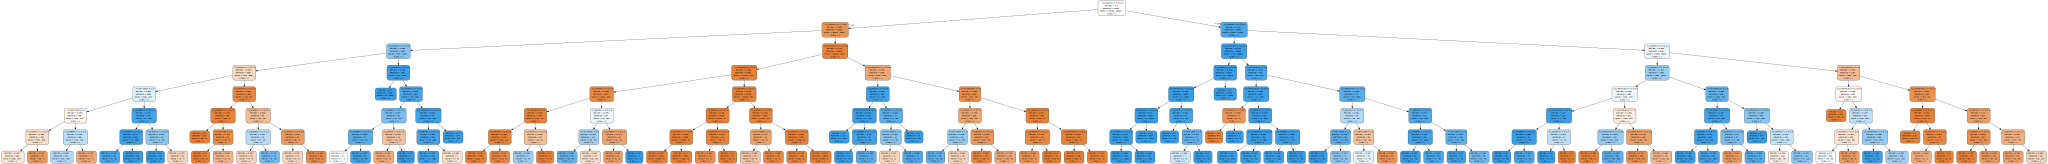

In [ ]:
dot_data = tree.export_graphviz(dt2, out_file=None, feature_names=x.columns,class_names=["1","2"],
                     filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Evaluacion de modelo

In [ ]:
predicted_values = dt2.predict(x_test)
cm=confusion_matrix(y_test,predicted_values)
cr=classification_report(y_test,predicted_values)
print('Classification report : \n',cr)

Classification report : 
               precision    recall  f1-score   support

           1       0.96      0.97      0.97      5286
           2       0.97      0.96      0.96      5004

    accuracy                           0.97     10290
   macro avg       0.97      0.97      0.97     10290
weighted avg       0.97      0.97      0.97     10290



Text(0.5, 23.52222222222222, 'y_head')

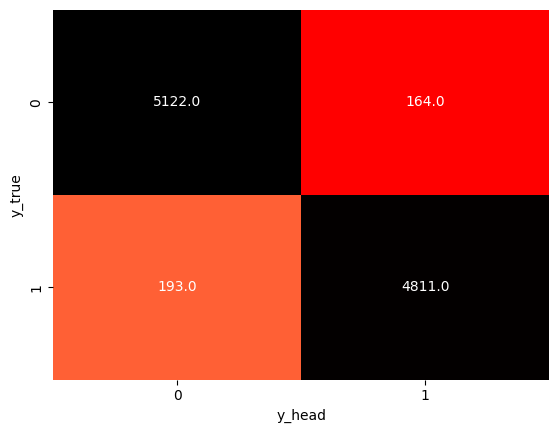

In [ ]:
g1 = sns.heatmap(cm,annot=True,fmt=".1f",cmap="flag",cbar=False)
g1.set_ylabel('y_true')
g1.set_xlabel('y_head')

### Predicciones

In [ ]:
scenario={"feature":["first_blood","first_tower","first_inhibitor","first_Baron","first_Dragon","first_RiftHerald",
"t1_tower","t1_inhibitor","t1_baron","t1_dragon","t2_tower","t2_inhibitor","t2_baron","t2_dragon"],
         "value":[1,1,2,1,1,1,10,2,1,4,7,2,1,1]}
scen=pd.DataFrame(scenario)
scen.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
feature,first_blood,first_tower,first_inhibitor,first_Baron,first_Dragon,first_RiftHerald,t1_tower,t1_inhibitor,t1_baron,t1_dragon,t2_tower,t2_inhibitor,t2_baron,t2_dragon
value,1,1,2,1,1,1,10,2,1,4,7,2,1,1


In [ ]:
x1=[[1,1,2,1,1,1,10,2,1,4,7,2,1,1]]
c=dt2.predict_proba(x1).reshape(-1,1)
print("winner is :" , dt2.predict(x1) )
print("first team win probability is % ", list(c[0]*100),"\nsecond team win probability is %:",list(c[1]*100)  )

winner is : [1]
first team win probability is %  [83.16831683168317] 
second team win probability is %: [16.831683168316832]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
x2=[[0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
c=dt2.predict_proba(x2).reshape(-1,1)
print("winner is :" , dt2.predict(x2) )
print("first team win probability is % ", list(c[0]*100),"\nsecond team win probability is %:",list(c[1]*100)  )

winner is : [1]
first team win probability is %  [55.338345864661655] 
second team win probability is %: [44.661654135338345]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Modelo de regresion para los campeones

El segundo modelo se basa en la proyeccion de Gold Efficiency, la cual en juego se representa que tan bien es utilizado el oro por campeon. utilice modelos de regresion sin aplicar parametros, (ya que vi que se solicita en otra entrega) los cuales son Regresion Lineas, Random Forest, Gradient Boosting, Decision Tree.

In [ ]:
df = pd.read_csv('./champions.csv')
df.head()

,Champion Name,Role,Base Health,Base Mana,Base Armor,Base Attack Damage,Gold Efficiency
0,Aatrox,Top,580,0,38,60,1.05
1,Ahri,Mid,526,418,21,53,1.02
2,Akali,Mid,575,200,23,62,1.03
3,Alistar,Support,600,350,44,62,1.08
4,Amumu,Jungle,615,285,33,53,1.06


### manejo de las variables categoricas

In [ ]:
df = pd.get_dummies(df, columns=['Role']) #esto transformara los valores de Top,Mid,Support,Jungle,ADC y agrega 5 nuevas columnas
df = df.drop(columns=['Champion Name'])
df.head()

,Base Health,Base Mana,Base Armor,Base Attack Damage,Gold Efficiency,Role_ADC,Role_Jungle,Role_Mid,Role_Support,Role_Top
0,580,0,38,60,1.05,False,False,False,False,True
1,526,418,21,53,1.02,False,False,True,False,False
2,575,200,23,62,1.03,False,False,True,False,False
3,600,350,44,62,1.08,False,False,False,True,False
4,615,285,33,53,1.06,False,True,False,False,False


### Entrenamiento de los datos

In [ ]:
X = df.drop(columns=['Gold Efficiency'])
y = df['Gold Efficiency']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Linear Regression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9371463807684988

### Random Forest

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9022086283185853

### Gradient Boosting

In [ ]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9055914964465063

### Decision tree

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6216814159292041

## Aplicacion de PCA

### Linear Regression

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


#primer modelo Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
model_acc = [model.score(X_test, y_test)]
model_name = ['Linear Regression','Linear Regression PCA']

In [ ]:
X = df.drop(columns=['Gold Efficiency'])
y = df['Gold Efficiency']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#aplica PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#acurracy
model = LinearRegression()
model.fit(X_train, y_train)
#mostrar accuracy
print(model.score(X_test, y_test))
#agregar accuracy a la lista
model_acc.append(model.score(X_test, y_test))


0.28438865738850827


### Confiable?

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.9228381 , 0.07413939])

### Comparacion

<Axes: >

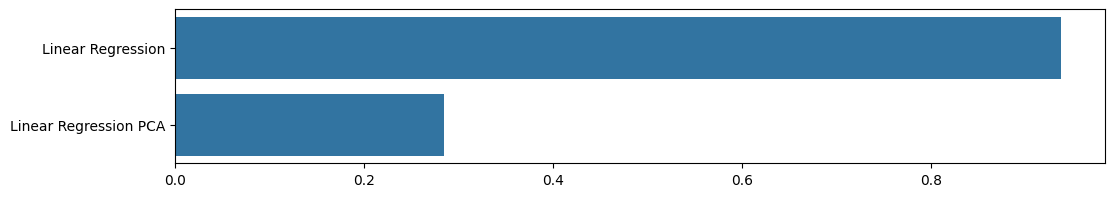

In [ ]:
plt.figure(figsize=(12,2))
sns.barplot(x=model_acc, y=model_name)

## Variables sinteticas

Primero revisamos la correlacion de las variables para seleccionar las mas relacionadas

<Axes: >

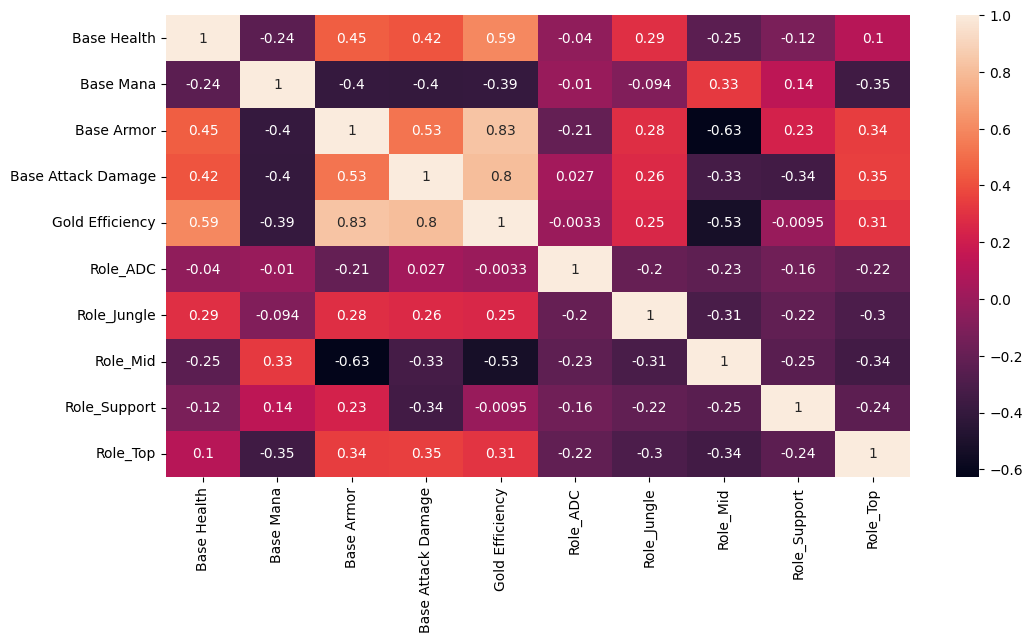

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)

In [ ]:
#creacion de variables sinteticas
#se tendra en cuenta las mas correlacionadas  Base Armor, Base Attack Damage

# variable de relacion entre Base Armor y Gold Efficiency
df['Armor_Efficiency'] = df['Base Armor'] * df['Gold Efficiency']

# variable de relacion entre Base Attack Damage y Gold Efficiency
df['Attack_Efficiency'] = df['Base Attack Damage'] * df['Gold Efficiency']

In [ ]:
df[['Armor_Efficiency','Attack_Efficiency']].head()

,Armor_Efficiency,Attack_Efficiency
0,39.90,63.00
1,21.42,54.06
2,23.69,63.86
3,47.52,66.96
4,34.98,56.18


In [ ]:
df.Armor_Efficiency.describe()

count    149.000000
mean      31.320000
std        7.609563
min       17.000000
25%       24.960000
50%       31.200000
75%       37.100000
max       51.700000
Name: Armor_Efficiency, dtype: float64

In [ ]:
df.Attack_Efficiency.describe()

count    149.000000
mean      62.086711
std        7.085460
min       45.000000
25%       56.100000
50%       63.000000
75%       67.200000
max       77.760000
Name: Attack_Efficiency, dtype: float64

Notemos que los valores se encuentras bastante bien, ya que lo importante es que esten entre 0 y 100

### Nuevo PCA

In [ ]:
pca = PCA(n_components=3)
X = df.drop(columns=['Gold Efficiency'])
y = df['Gold Efficiency']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8916035669195184

In [ ]:
model_name.append('Linear Regression PCA with Synthetic Variables')
model_acc.append(model.score(X_test, y_test))

<Axes: >

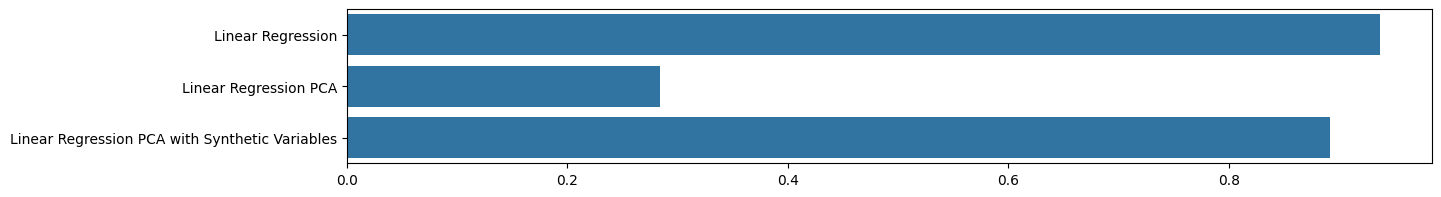

In [ ]:
plt.figure(figsize=(14,2))
sns.barplot(x=model_acc, y=model_name)


Podemos ver una mejora en el modelo evaluado despues del PCA agregando estas dos variables sinteticas. sin embargo aqui agregamos un componente mas, pero sin agregar este componente mas se obtiene un 0.57 aprox lo cual es una mejora significativa ya que sin agregar las variables se obtenia aproximadamente 0.3